In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

X, Y = load_iris(True)
#print(X)
#print(Y)

In [ ]:
# number of training samples
m = Y.shape[0]

# find index of 3rd class
index = []
for i in range(m):
  if Y[i] == 2:
    index.append(i)

# remove data of that class
X = np.delete(X, index, axis=0)
Y = np.delete(Y, index)


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X) #normalization

m = Y.shape[0]
one_x = np.ones((m,1))
X = np.append(one_x, X, axis=1) # add one col of 1's 
n = X.shape[1]

In [ ]:
#splitting : 60(test) 30(train) 10(validation)
X_test, X_validation_and_train, y_test, y_validation_and_train = train_test_split(X, Y, test_size=0.4, random_state=1)
X_train, X_validation, y_train, y_validation = train_test_split(X_validation_and_train, y_validation_and_train, test_size=0.25, random_state=1)

In [ ]:
#sets of hyperparameters
alpha_list = [0.3, 0.03, 0.003]
rho_list = [0.0001, 0.00001, 0.000001]
epoch_list = [1000, 2000, 3000]

In [ ]:
def sigmoid(w, X):
  return 1.0/(1 + np.exp(-np.dot(X, w.T), dtype=np.float128))

In [ ]:
#Jitr(w)
def cost_func(hypothesis, Y):
  y_1 = Y * np.log(hypothesis)
  y_0 = (1 - Y) * np.log(1 - hypothesis)
  cost = -y_1 - y_0
  return np.mean(cost)

In [ ]:
# (h(Xi) - Yi)Xi,j
def log_gradient(hypothesis, Y, X) :
  difference = hypothesis - Y
  gradient = np.dot(difference.T, X)

  return gradient

In [ ]:
#convert into binary output
def predict_values(w, X) :
   predicted_probability = sigmoid(w, X)
   predicted_value = np.where(predicted_probability >= .5, 1, 0)
   return predicted_value
  

In [ ]:
def logistic_regression(X, Y, hyper_i = 1, test_overfitting = False, val_X = None, val_Y = None) :
  
  alpha = alpha_list[hyper_i]
  rho = rho_list[hyper_i]
  max_epoch = epoch_list[hyper_i]

  J_change = 1000
  epoch = 0
  w = np.ones(n)
  past_cost = []
  validation_cost = []
  m = Y.shape[0]

  while(J_change > rho or max_epoch > epoch) :
    
    hypothesis = sigmoid(w, X) #calculate h(xi)

    Jitr = cost_func(hypothesis, Y) #claculate Jitr
    past_cost.append(Jitr)

    w = w - (alpha * (1/m) *log_gradient(hypothesis, Y, X)) #update all parameters

    if(test_overfitting) :
      validation_hypothesis = sigmoid(w, val_X)
      validation_Jitr = cost_func(validation_hypothesis, val_Y)
      validation_cost.append(validation_Jitr)


    if(epoch > 0) :
      J_change = abs(past_cost[-1] - past_cost[-2])
    epoch += 1

  #Apply threshold to take final decision for binary classification 
  Y_pred = predict_values(w, X)
  correct_predictions = np.sum(Y == Y_pred)
  accuracy = correct_predictions / Y.shape[0]

  return Jitr, accuracy, past_cost, validation_cost, epoch



In [ ]:
#Hyperparameter Tuning

print(logistic_regression(X_validation, y_validation, 0)[:2])
print(logistic_regression(X_validation, y_validation, 1)[:2])
print(logistic_regression(X_validation, y_validation, 2)[:2])


(0.001366449318041746387, 1.0)
(0.0060951952388647562767, 1.0)
(0.011257220815752385957, 1.0)


In [ ]:
# train the model
model = logistic_regression(X_train, y_train, 0, True, X_validation, y_validation)

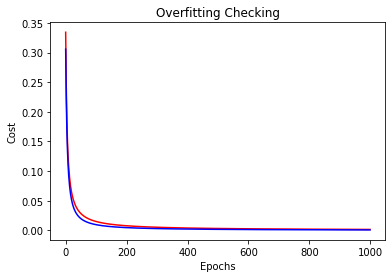

In [ ]:
import matplotlib.pyplot as plt
plt.title('Overfitting Checking')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.plot(model[2] ,'r')
plt.plot(model[3] ,'b')
plt.show()

In [ ]:
#30% train 10% validation 60% test
X_test, X_validation_and_train, y_test, y_validation_and_train = train_test_split(X, Y, test_size=0.4, random_state=1)
X_train, X_validation, y_train, y_validation = train_test_split(X_validation_and_train, y_validation_and_train, test_size=0.25, random_state=1)
print(logistic_regression(X_validation, y_validation, 0)[:2])

(0.001366449318041746387, 1.0)


In [ ]:
#40% train 10% validation 50% test
X_test, X_validation_and_train, y_test, y_validation_and_train = train_test_split(X, Y, test_size=0.5, random_state=1)
X_train, X_validation, y_train, y_validation = train_test_split(X_validation_and_train, y_validation_and_train, test_size=0.25, random_state=1)
print(logistic_regression(X_validation, y_validation, 0)[:2])

(0.0017132576509581617789, 1.0)


In [ ]:
#50% train 10% validation 40% test
X_test, X_validation_and_train, y_test, y_validation_and_train = train_test_split(X, Y, test_size=0.4, random_state=1)
X_train, X_validation, y_train, y_validation = train_test_split(X_validation_and_train, y_validation_and_train, test_size=0.25, random_state=1)
print(logistic_regression(X_validation, y_validation, 0)[:2])

(0.001366449318041746387, 1.0)


In [ ]:
#60% train 10% validation 30% test
X_test, X_validation_and_train, y_test, y_validation_and_train = train_test_split(X, Y, test_size=0.4, random_state=1)
X_train, X_validation, y_train, y_validation = train_test_split(X_validation_and_train, y_validation_and_train, test_size=0.25, random_state=1)
print(logistic_regression(X_validation, y_validation, 0)[:2])

(0.001366449318041746387, 1.0)


In [ ]:
#70% train 10% validation 20% test
X_test, X_validation_and_train, y_test, y_validation_and_train = train_test_split(X, Y, test_size=0.4, random_state=1)
X_train, X_validation, y_train, y_validation = train_test_split(X_validation_and_train, y_validation_and_train, test_size=0.25, random_state=1)
print(logistic_regression(X_validation, y_validation, 0)[:2])

(0.001366449318041746387, 1.0)
